# **In Vehicle Coupon Recommendation**
Analysis of an Amazon data set corresponding to in-vehicle coupon recommendation for a driver under different scenarios relating to destination, current time, weather etc.(feature variables) and whether the driver accepts the coupon or not (target variable).
Dataset Source- https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt


In [2]:
#Importing the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv')
data = pd.DataFrame(data)

### **EDA & Preprocessing**

In [3]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


So, the dataset has 12684 entries, with a mix of categorical and ordinal features (total 25) and 'Y' being the target variable with values 1 or 0 indicating coupon accepted or rejected. For complete details and explation of each feature, refer to the dataset source link.

Let's continue with null values analysis.

In [4]:
for i in list(data.columns.values):
    print(i + "-" + str(data[i].isna().sum()))


destination-0
passanger-0
weather-0
temperature-0
time-0
coupon-0
expiration-0
gender-0
age-0
maritalStatus-0
has_children-0
education-0
occupation-0
income-0
car-12576
Bar-107
CoffeeHouse-217
CarryAway-151
RestaurantLessThan20-130
Restaurant20To50-189
toCoupon_GEQ5min-0
toCoupon_GEQ15min-0
toCoupon_GEQ25min-0
direction_same-0
direction_opp-0
Y-0


Some features do have null values. Lets us see with a visualization.

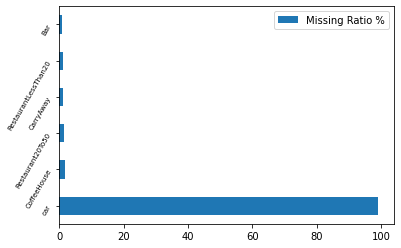

In [5]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.yticks(rotation = 60, size = 7)
        plt.show()
    else:
        print('No NAs found')
plot_nas(data)

Removing features with >80% null values. There is only one such feature. Also, dropping all rows containing null values.

In [6]:
limitPer = len(data) * .80
data = data.dropna(thresh=limitPer, axis=1)
data = data.dropna(how='any',axis=0)

Now, plotting histograms of all the features to see their value distributions.

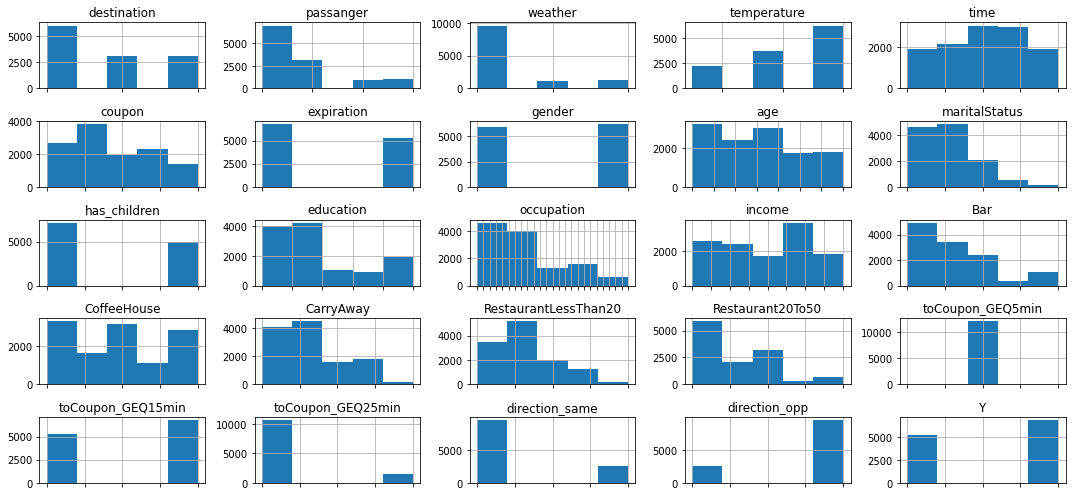

In [7]:
fig = plt.figure(figsize=(15,7))
for i, var_name in enumerate(data.columns.to_list()):
            ax=fig.add_subplot(5,5,i+1)
            data[var_name].hist(bins=5,ax=ax)
            plt.tick_params(axis='x', labelbottom=False)
            ax.set_title(var_name)
fig.tight_layout()
plt.show()

The feature 'toCoupon_GEQ5min'(feature meaning: driving time to the restaurant/bar for using the coupon is greater than 25 minutes) has only one value in all entries. Clearly it should be removed. Also, direction_same & direction_opp are have a linear inverse relationship so one of them will be dropped.

In [8]:
data.drop(['toCoupon_GEQ5min', 'direction_opp'], axis=1, inplace=True)

Now, creating dummy variables for all of our categorical features.

In [9]:
data_features = data.columns[:-1]
dummy_list = data.select_dtypes(include=['object']).columns
data['temperature'] = data['temperature'].apply(str)
dummy_list = dummy_list.append([pd.Index(['temperature'])])
for i in dummy_list :
    data[i] = i + "-" + data[i]

for i in dummy_list:
    d = pd.get_dummies(data[i], drop_first=True)
    data.drop(i, axis=1, inplace = True)
    data = pd.concat([d, data], axis=1)
data.reset_index(drop=True, inplace=True)

As the next step, looking into correlation between the dummy variables with a heatmap.

<AxesSubplot:>

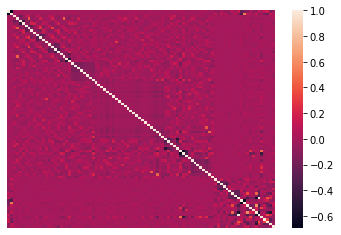

In [10]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr,
        xticklabels=False,
        yticklabels=False)

It appears, some dummy variables have a high level of correlation. Some even appear to be perfectly correlated, let's find out which.

In [11]:
corr = corr.rename_axis(index='idx', columns='cols')
per_corr = corr.stack().reset_index(name='value').query('value == 1')
print(per_corr[per_corr.idx != per_corr.cols])

                   idx              cols  value
7354          time-7AM  destination-Work    1.0
7991  destination-Work          time-7AM    1.0


So, our dummy variables 'time-7AM' & 'destination-Work' are perfectly correlated. It also makes sense that they possibly could. So, dropping one of them.

In [12]:
data.drop('time-7AM', axis=1, inplace=True)

### **Modelling**
Just to emphasize, what we are dealing with is a classification problem. I intend to build and evaluate several models such as Logistic Regression, Support Vector Machine, Random Forest, XGBoost, Stacked Model.

#### **Creating Train-Test set**
Creating Train-Test set with 70%-30% split of data.

In [13]:
from sklearn import model_selection
data.columns = data.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    data.loc[:, data.columns != 'Y'], data['Y'], test_size=0.3, random_state=0
)

#### **Base Model**
Creating base majority class model for reference.

In [14]:
from sklearn.dummy import DummyClassifier
Y_train.value_counts()
base_model = DummyClassifier()

let's check accuracy and other metrics.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
base_predict = model_selection.cross_val_predict(base_model, X_train, Y_train, cv =5)
print(accuracy_score(Y_train, base_predict))
print(classification_report(Y_train, base_predict))

0.5674748669426375
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3657
           1       0.57      1.00      0.72      4798

    accuracy                           0.57      8455
   macro avg       0.28      0.50      0.36      8455
weighted avg       0.32      0.57      0.41      8455



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So, cross-validation accuracy of base model is **0.57**. 

#### **Logistic Regression Model**
Creating Logistic Regression model. Also, using grid search for hyperparameter tuning.

In [16]:
from sklearn.linear_model import LogisticRegression
logclassifier = LogisticRegression(class_weight = 'balanced', max_iter=10000)
parameters_logclassifier = {'penalty':['elasticnet'],'C':[1, 5, 10],'l1_ratio':[0, 0.25, 0.5, 0.75, 1],'solver':['saga']}
logclassifier_grid = model_selection.GridSearchCV(logclassifier, parameters_logclassifier)

Fitting the model.

In [17]:
logclassifier_grid.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             param_grid={'C': [1, 5, 10], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'penalty': ['elasticnet'], 'solver': ['saga']})

Let's look at hyperparameters of the best estimators.

In [18]:
logclassifier_grid.best_params_

{'C': 5, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}

Finally, evaluating the performance of the model.

In [19]:
predictions_logclassifiergrid = logclassifier_grid.best_estimator_.predict(X_test)
print(confusion_matrix(Y_test, predictions_logclassifiergrid))
print(classification_report(Y_test, predictions_logclassifiergrid))

[[1067  478]
 [ 692 1387]]
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1545
           1       0.74      0.67      0.70      2079

    accuracy                           0.68      3624
   macro avg       0.68      0.68      0.67      3624
weighted avg       0.69      0.68      0.68      3624



So, the accuracy is **0.68**.

#### **Support Vector Machine**
Let's evaluate performance of SVM for our classification task.


In [20]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svm_grid = model_selection.GridSearchCV(svclassifier, parameters)
svm_grid.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

Cheking the best hyperparameters.

In [21]:
svm_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

Evaluating performance.

In [22]:
predictions_svmgrid = svm_grid.best_estimator_.predict(X_test)
print(confusion_matrix(Y_test, predictions_svmgrid))
print(classification_report(Y_test, predictions_svmgrid))

[[1091  454]
 [ 432 1647]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1545
           1       0.78      0.79      0.79      2079

    accuracy                           0.76      3624
   macro avg       0.75      0.75      0.75      3624
weighted avg       0.76      0.76      0.76      3624



It's better than LR with accuracy at about **0.76**.

#### **Random Forest**
Implementing Random Forest. Let's see its performance on our data.

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier()
parameters_rf = {'n_estimators':[50, 100, 150], 'criterion':('gini', 'entropy')}
rf_grid = model_selection.GridSearchCV(rfclassifier, parameters_rf)
rf_grid.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'n_estimators': [50, 100, 150]})

In [24]:
rf_grid.best_params_

{'criterion': 'gini', 'n_estimators': 150}

In [25]:
predictions_rfgrid = rf_grid.best_estimator_.predict(X_test)
print(confusion_matrix(Y_test, predictions_rfgrid))
print(classification_report(Y_test, predictions_rfgrid))

[[1016  529]
 [ 348 1731]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1545
           1       0.77      0.83      0.80      2079

    accuracy                           0.76      3624
   macro avg       0.76      0.75      0.75      3624
weighted avg       0.76      0.76      0.76      3624



Accuracy of **0.76**, no improvement from SVM.

##### **XGBoost**
Evaluation of of boosting ensemble model XGBoost. 

In [26]:
from xgboost import XGBClassifier
xgbclassifier = XGBClassifier()
parameters_xgb = {'n_estimators':[50, 75, 100, 125, 150], 'learning_rate':[0.02, 0.025, 0.03, 0.035, 0.04],
                 'max_depth':[4,5,6,7,8]}
xgb_grid = model_selection.GridSearchCV(xgbclassifier, parameters_xgb)
xgb_grid.fit(X_train, Y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                               

In [27]:
xgb_grid.best_params_

{'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 150}

In [28]:
predictions_xgbgrid = xgb_grid.best_estimator_.predict(X_test)
print(confusion_matrix(Y_test, predictions_xgbgrid))
print(classification_report(Y_test, predictions_xgbgrid))

[[1040  505]
 [ 369 1710]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1545
           1       0.77      0.82      0.80      2079

    accuracy                           0.76      3624
   macro avg       0.76      0.75      0.75      3624
weighted avg       0.76      0.76      0.76      3624



Not any improvement with XGBoost either with prediction accuracy **0.76**.

#### **Stacked Classifier**
Creating a stacked classifier with SVC, RF & XGBoost with SVC also simultaneously used as final estimator.

In [29]:
from sklearn.ensemble import StackingClassifier

final_estimator = svm_grid.best_estimator_

stacked_model = StackingClassifier(
                estimators=[('xgb', xgb_grid.best_estimator_), ('svm', svm_grid.best_estimator_)
                ,('rf', rf_grid.best_estimator_)],
                final_estimator = final_estimator)

stacked_model.fit(X_train, Y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.04, max_bin=256,
                                              max_ca

In [30]:
predictions_sm = stacked_model.predict(X_test)
print(confusion_matrix(Y_test, predictions_sm))
print(classification_report(Y_test, predictions_sm))

[[1056  489]
 [ 325 1754]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1545
           1       0.78      0.84      0.81      2079

    accuracy                           0.78      3624
   macro avg       0.77      0.76      0.77      3624
weighted avg       0.77      0.78      0.77      3624



So, accuracy for the stacking classifier - **0.78**

### **Interpretation**
Interpreting the models and feature importances using SHAP(SHapley Additive exPlanations) values. Only LR and XGBoost. 

#### **Logistic Regression**
Logistic Regression Model feature importances using SHAP values.

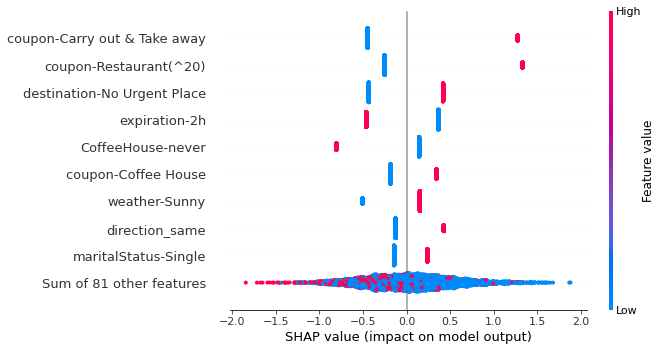

In [31]:
import shap
explainer = shap.Explainer(logclassifier_grid.best_estimator_, X_train, feature_names=data.columns[:-1])
lr_shap_values = explainer(X_test)
shap.plots.beeswarm(lr_shap_values)

The above plot shows the SHAP values as a measure of the impact of our dummy variables for their different values (here basically 0 & 1). For instance, looking at the top dummy variables on the plot, coupon-Carry out& Take away, Restaurant(<20USD) we can see SHAP values for low and high dummy variables values(0 & 1). The first two dummy variables have a higher positive SHAP value for '1' and negative for '0', however dummy variable expiration-2h has a higher negative SHAP value for '1' and positive for '0'.
We can interpret their impact accordingly. 

Plotting total impact summary plot now,

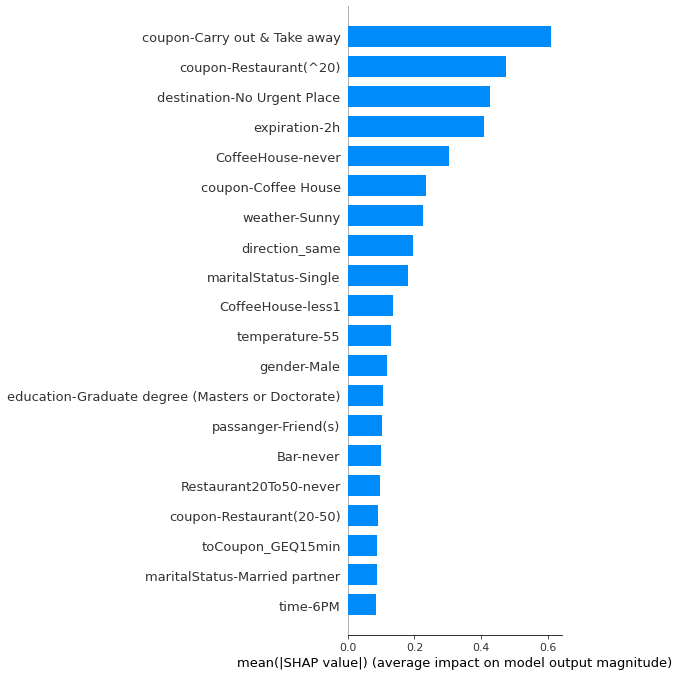

In [32]:
shap.summary_plot(lr_shap_values, X_test, plot_type="bar")

The plot above shows mean SHAP value by dummy variables. The higher the SHAP value the higher the importance of the dummy variable.

Finally, a caveat to be noted. We are looking at importances of only individual dummy variables, but we are interested in the importances of the feature group rather than the individual categories within the feature group indicated by the dummy variables we created. 
One way to evaluate importances for the entire feature group using SHAP values is to simply average the SHAP values for individual dummy variable catergories.
So, proceeding with evaluating SHAP values for the entire feature groups.

In [33]:
lr_shap_sum = [sum(i) for i in zip(*abs(lr_shap_values.values))]
lr_shap_mean = [x/3624 for x in lr_shap_sum]
lr_shap_df = pd.DataFrame()
lr_shap_df['features'] = data.columns[:-1]
lr_shap_df['shap_mean'] = lr_shap_mean

lr_shap_total = pd.DataFrame()
lr_shap_total['features'] = data_features
lr_shap_total['shap_total'] = ''
for i in range(22) :
    lr_shap_sub = lr_shap_df[lr_shap_df['features'].str.startswith(lr_shap_total.iloc[i,0])]
    lr_shap_mean = sum(lr_shap_sub['shap_mean'])/len(lr_shap_sub['shap_mean'])
    lr_shap_total.at[i, 'shap_total'] = lr_shap_mean
lr_shap_total.sort_values(by=['shap_total'], inplace = True)

Now, plotting SHAP value vs Feature group bar plot.

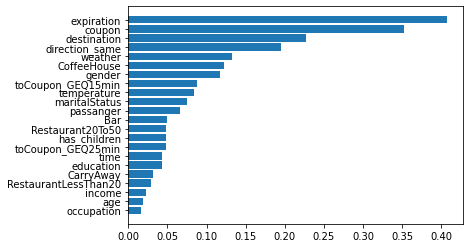

In [34]:
plt.barh(lr_shap_total['features'], lr_shap_total['shap_total'])
plt.show()

So, **expiration**(duration in which coupon expires), **coupon**(type of coupon), **destination**, **direction_same**(whether restaurant/bar is in the same direction as destination) have the most importance, in that order. Refer to data source for more details of what the features represent.

#### **XGBoost**
Repeating the same for XGBoost to get feature importances using SHAP values.

In [35]:
explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
xg_shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Plotting, the summary bar plot.

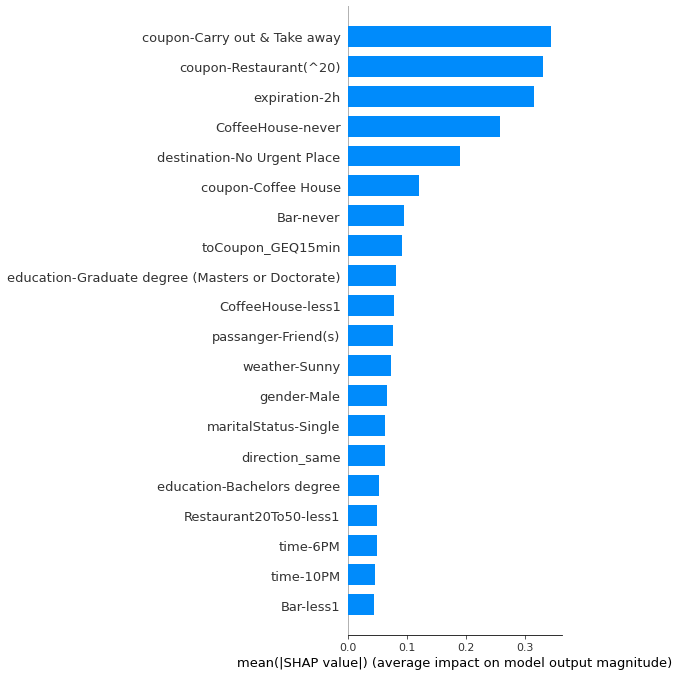

In [36]:
shap.summary_plot(xg_shap_values, X_test, plot_type="bar")

We mostly see the same order we got for LR model.
However, now as before we want importances for the entire feature group. So, repeating the same process to get SHAP values for the entire feature group.

In [37]:
xg_shap_sum = [sum(i) for i in zip(*abs(xg_shap_values))]
xg_shap_mean = [x/3624 for x in xg_shap_sum]
xg_shap_df = pd.DataFrame()
xg_shap_df['features'] = data.columns[:-1]
xg_shap_df['shap_mean'] = xg_shap_mean

xg_shap_total = pd.DataFrame()
xg_shap_total['features'] = data_features
xg_shap_total['shap_total'] = ''
for i in range(22) :
    xg_shap_sub = xg_shap_df[xg_shap_df['features'].str.startswith(xg_shap_total.iloc[i,0])]
    xg_shap_mean = sum(xg_shap_sub['shap_mean'])/len(xg_shap_sub['shap_mean'])
    xg_shap_total.at[i, 'shap_total'] = xg_shap_mean
xg_shap_total.sort_values(by=['shap_total'], inplace = True)

plotting SHAP value vs Feature group bar plot.

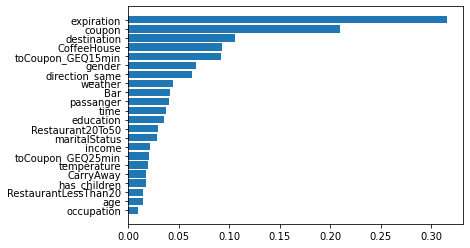

In [38]:
plt.barh(xg_shap_total['features'], xg_shap_total['shap_total'])
plt.show()

So, we get mostly the same order as we got earlier for LR model feature importance analysis.

## **Summary**

#### **1.** Build a Stacking Classifer with an accuracy of **0.78**. This a not a significant improvement from either SVC, RF or XGB all of which have accuracy **0.76**. So, its not computationally worth it.
#### **2.** We, interpreted that the features, **expiration**, **coupon**, **destination**, **CoffeeHouse** have the most importance/impact. So, factors such as duration in which coupon expires, the type of coupon offered, destination of the driver and frequency of Coffee House visits have the most impact on whether the driver will accept the coupon or not.